In [159]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [161]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [162]:
df['Health_Issues'].unique()

array([nan, 'Mild', 'Moderate', 'Severe'], dtype=object)

In [163]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
Mild,3579
Moderate,463
Severe,17


In [164]:
df['Health_Issues'] = df['Health_Issues'].fillna('None')

In [165]:
df['Health_Issues'].unique()

array(['None', 'Mild', 'Moderate', 'Severe'], dtype=object)

In [166]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17


# Cleaning

Karena banyak sekali Health_Issues yang mungkin bermaksud untuk di isi NONE(tidak memiliki helat issues) tetapi tidak di isi karena tidak ada kategori NONE maka saya replace yang none dengan anggapan tidak memiliki health issues

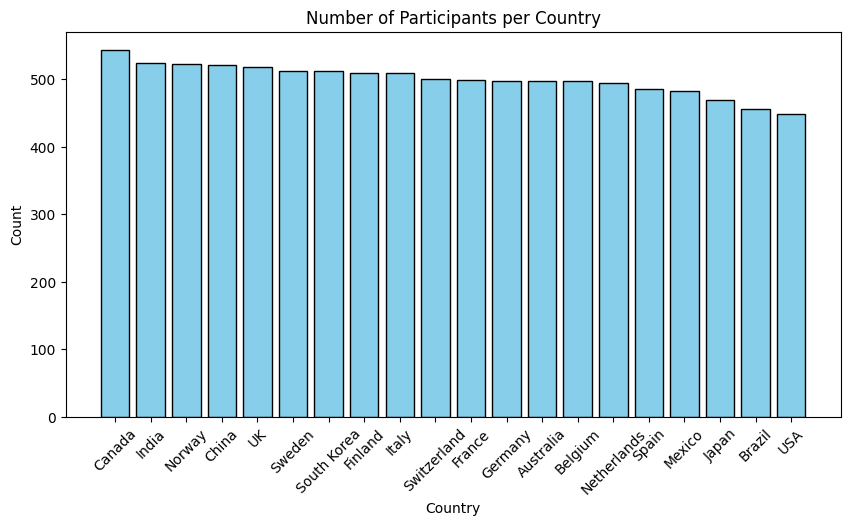

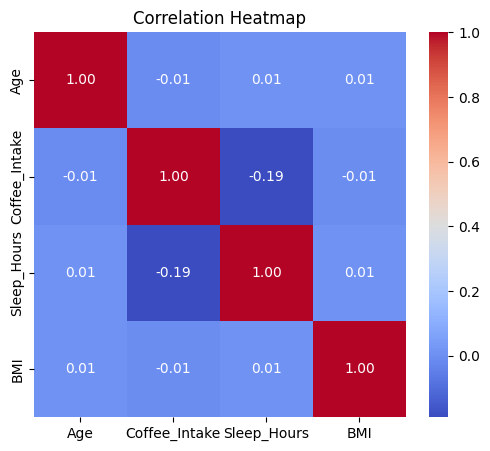

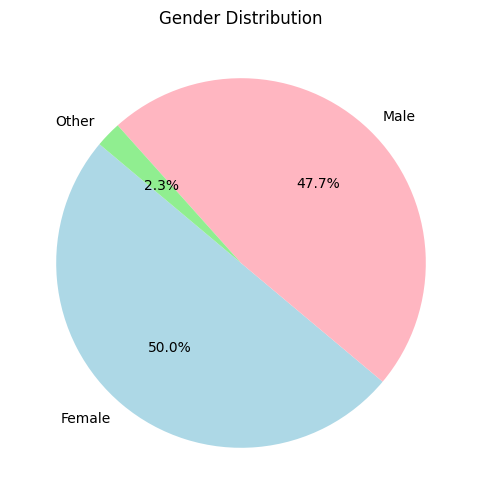

In [167]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Participants per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

import seaborn as sns
corr = df[['Age','Coffee_Intake','Sleep_Hours','BMI']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightblue', 'lightpink', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


# Interpretation


*   Beradasarkan data diatas, Negara dengan peminum kopi terbanyak terletak di Canada
*   Beradasarkan data diatas, Coffee_Intake memiliki hubungan yang lemah dengan
*   List item

In [168]:
# Cek dulu unique values sebelum mapping
for column in ['Gender', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Country']:
    print(column, ":", df[column].unique())

# Encoding maps
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {
 'Australia': 1, 'Belgium': 2, 'Brazil': 3, 'Canada': 4, 'China': 5,
 'Finland': 6, 'France': 7, 'Germany': 8, 'India': 9, 'Italy': 10,
 'Japan': 11, 'Mexico': 12, 'Netherlands': 13, 'Norway': 14,
 'South Korea': 15, 'Spain': 16, 'Sweden': 17, 'Switzerland': 18,
 'UK': 19, 'USA': 20
}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {
 'Healthcare': 1, 'Office': 2, 'Other': 3, 'Service': 4, 'Student': 5
}
health_issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

# Apply mapping dengan nama kolom yang benar
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)

# Cek hasil
df.sample(n=10)


Gender : ['Male' 'Female' 'Other']
Sleep_Quality : ['Good' 'Fair' 'Excellent' 'Poor']
Stress_Level : ['Low' 'Medium' 'High']
Health_Issues : ['None' 'Mild' 'Moderate' 'Severe']
Occupation : ['Other' 'Service' 'Office' 'Student' 'Healthcare']
Country : ['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
8300,8301,52,2,18,2.7,259.6,5.6,2,21.6,72,2,11.6,2,5,0,1
6915,6916,19,2,11,4.2,402.1,4.9,1,17.3,69,3,2.6,1,1,0,0
7478,7479,58,2,15,2.3,221.9,6.5,3,23.6,86,1,14.2,1,1,0,1
275,276,40,2,20,1.5,141.7,7.9,3,20.0,52,1,5.7,0,1,1,0
3931,3932,53,2,14,5.4,513.1,5.6,2,23.2,66,2,1.3,2,4,0,0
8159,8160,25,1,15,3.5,335.5,4.6,1,23.2,80,3,5.3,1,2,0,0
9843,9844,19,1,7,4.3,413.1,7.8,3,26.8,69,1,0.7,0,3,0,0
4041,4042,44,1,9,2.9,279.6,6.2,3,26.9,79,1,3.0,0,1,1,0
1661,1662,33,1,18,2.1,202.1,6.2,3,27.7,69,1,14.6,0,5,1,0
5076,5077,35,1,19,2.2,206.5,8.1,4,19.9,66,1,2.7,0,4,1,0


In [169]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

X.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,8,3.5,328.1,7.5,3,24.9,78,1,14.5,3,0,0
1,2,33,1,8,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,3,42,1,3,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,4,53,1,8,2.6,249.2,7.3,3,24.7,71,1,6.6,3,0,0
4,5,32,2,16,3.1,298.0,5.3,2,24.1,76,2,8.5,5,0,1


In [170]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


In [171]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [172]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 15), (2000, 15))

In [173]:
X_train.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,9255,37,1,16,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,1562,26,1,9,0.0,0.0,5.5,2,28.3,75,2,10.8,3,0,0
1670,1671,32,1,15,2.8,268.1,7.3,3,27.4,69,1,8.6,2,0,0
6087,6088,18,1,15,2.2,208.6,8.1,4,16.3,83,1,8.9,3,0,1
6669,6670,43,2,19,2.6,251.1,9.4,4,25.4,68,1,3.4,2,0,0


In [174]:
X_test.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,6253,66,1,14,2.6,245.9,6.7,3,30.1,76,1,1.9,4,0,1
4684,4685,22,2,12,3.1,293.1,7.6,3,20.4,69,1,5.0,4,0,0
1731,1732,30,1,1,3.9,372.4,6.4,3,27.5,75,1,13.8,2,0,0
4742,4743,35,1,8,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,4522,47,1,10,1.3,119.0,6.9,3,28.4,64,1,9.6,2,1,0


In [175]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [176]:
y_pred_gini = clf_gini.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


[Text(0.5, 0.9, 'x[7] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[1] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[8] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[8] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[1] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[8] <= 29.95

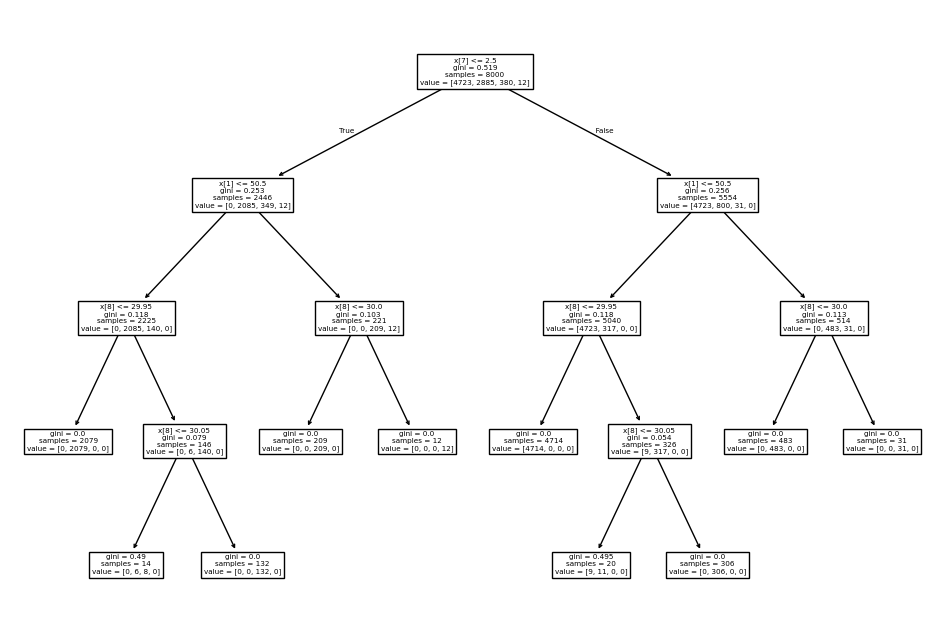

In [178]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [179]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [180]:
y_pred_en = clf_en.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[7] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[1] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[8] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[1] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

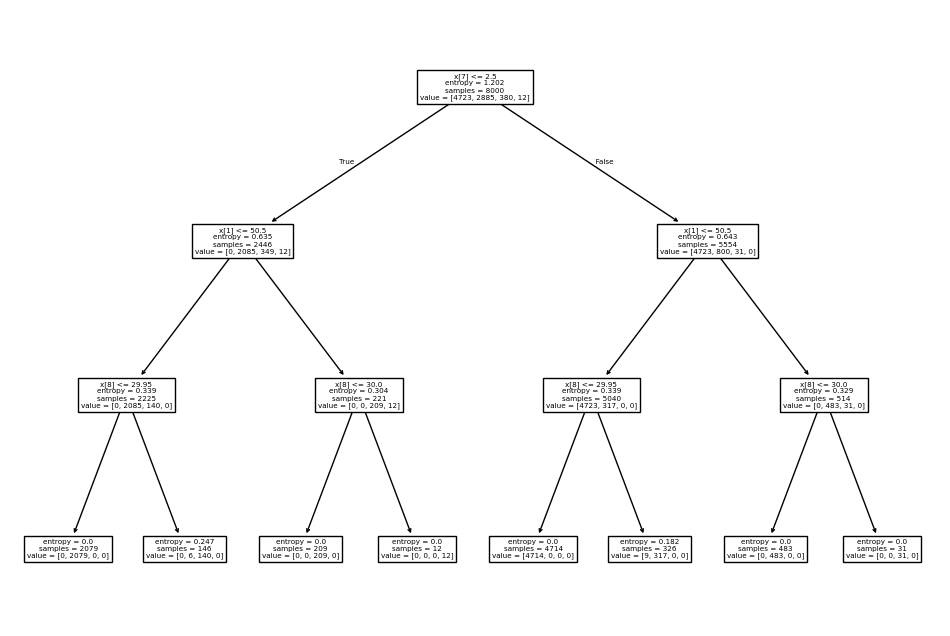

In [182]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [183]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [184]:
y_pred_nb = nb_classifier.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8580


In [186]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [187]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [188]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.89      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.49      2000
weighted avg       0.85      0.86      0.84      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# CONCLUSION
Naïve Bayes menghasilkan akurasi 85.8% yang menunjukkan performa cukup baik, sedangkan Decision Tree dengan kriteria entropy maupun gini mencapai akurasi hampir sempurna 99.65%, menandakan model sangat mampu mengenali pola data meskipun perlu diwaspadai potensi overfitting.

In [191]:
# Pastikan saat training ID sudah di-drop
X = df.drop(columns=['ID','Health_Issues'])
y = df['Health_Issues']

# Split + training Decision Tree Gini
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# --- New data encoded sesuai mapping
row = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Occupation': occupation_map['Student'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Smoking': 1,
    'Alcohol_Consumption': 1
}

# Buat dataframe sesuai kolom training (X.columns)
input_df = pd.DataFrame([row], columns=X.columns)

# Prediksi
prediction_gini = clf_gini.predict(input_df)

inv_health_map = {0:'None', 1:'Mild', 2:'Moderate', 3:'Severe'}
print("Prediksi Health Issues:", inv_health_map[prediction_gini[0]])


Prediksi Health Issues: Mild
